# Homework 1

Load and validate GSS data

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [17]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf

## Loading and validation


In [18]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

Read the variables I selected from the GSS dataset.  You can look up these variables at https://gssdataexplorer.norc.org/variables/vfilter

In [19]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [20]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

Here are summary statistics for the variables I have validated and cleaned.

In [21]:
gss['year'].describe()

count    62466.000000
mean      1994.072359
std         12.937941
min       1972.000000
25%       1984.000000
50%       1994.000000
75%       2006.000000
max       2016.000000
Name: year, dtype: float64

In [22]:
gss['sex'].describe()

count    62466.000000
mean         1.558768
std          0.496538
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [23]:
gss['age'].describe()

count    62245.000000
mean        45.991341
std         17.505563
min         18.000000
25%         31.000000
50%         44.000000
75%         59.000000
max         89.000000
Name: age, dtype: float64

In [24]:
gss['cohort'].describe()

count    62245.000000
mean      1948.087075
std         20.998696
min       1883.000000
25%       1934.000000
50%       1950.000000
75%       1963.000000
max       1998.000000
Name: cohort, dtype: float64

In [25]:
gss['race'].describe()

count    62466.000000
mean         1.247335
std          0.540917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: race, dtype: float64

In [26]:
gss['educ'].describe()

count    62292.000000
mean        12.837234
std          3.179130
min          0.000000
25%         12.000000
50%         12.000000
75%         15.000000
max         20.000000
Name: educ, dtype: float64

In [27]:
gss['realinc'].describe()

count     56141.000000
mean      31636.199666
std       29402.370825
min         234.000000
25%       12080.625000
50%       24097.500000
75%       39022.500000
max      162607.000000
Name: realinc, dtype: float64

In [28]:
gss['wtssall'].describe()

count    62466.000000
mean         1.000016
std          0.461927
min          0.391825
25%          0.550100
50%          0.988100
75%          1.098500
max          8.739876
Name: wtssall, dtype: float64

**Exercise** 

1. Look through the column headings to find a few variables that look interesting.  Look them up on the GSS data explorer.  

2. Use `value_counts` to see what values appear in the dataset, and compare the results with the counts in the code book.  

3. Identify special values that indicate missing data and replace them with `NaN`.

4. Use `describe` to compute summary statistics.  What do you notice?

In [30]:
gss['sibs'].value_counts().sort_index()

-1      1518
 0      3047
 1     10152
 2     11313
 3      9561
 4      7024
 5      5066
 6      3849
 7      3296
 8      2165
 9      1608
 10     1105
 11      865
 12      577
 13      393
 14      220
 15      146
 16      108
 17       52
 18       44
 19       25
 20       31
 21       49
 22       17
 23       15
 24        5
 25        6
 26        6
 27        7
 28        1
 29        2
 30        4
 31        6
 32        2
 33        2
 34        1
 35        1
 37        1
 43        1
 55        1
 68        1
 98       59
 99      114
Name: sibs, dtype: int64

In [32]:
gss.sibs.replace([-1], np.nan, inplace=True)
gss.sibs.replace([98], np.nan, inplace=True)
gss.sibs.replace([99], np.nan, inplace=True)

In [33]:
gss['sibs'].describe()

count    60775.000000
mean         3.922155
std          3.184487
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         68.000000
Name: sibs, dtype: float64

The average number of siblings is much higher than I would have expected. A mean of nearly 4 siblings seems enormous when the majority of people I know do not have that many siblings. Also, the numbers from value_counts() appear to match the codebook.

In [40]:
gss['degree'].value_counts().sort_index()

0    13325
1    32017
2     3472
3     9010
4     4469
8       30
9      143
Name: degree, dtype: int64

In [41]:
gss.degree.replace([8], np.nan, inplace=True)
gss.degree.replace([9], np.nan, inplace=True)

In [43]:
gss['degree'].describe()

count    62293.000000
mean         1.346331
std          1.172157
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: degree, dtype: float64

These statistics align pretty well with what I expected, as it indicates the mean highest level of education is somewhere between high school and junior college for the years 1972-2016. The results seem to match the codebook.

In [48]:
gss['natspac'].value_counts().sort_index()

0    26502
1     4520
2    13834
3    15313
8     2228
9       69
Name: natspac, dtype: int64

In [49]:
gss.natspac.replace([8], np.nan, inplace=True)
gss.natspac.replace([9], np.nan, inplace=True)
gss.natspac.replace([0], np.nan, inplace=True)

In [50]:
gss['natspac'].describe()

count    33667.000000
mean         2.320581
std          0.697378
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: natspac, dtype: float64

The numbers line up with the codebook. I am a bit surprised that most people think we spend too much on space exploration. I would be interested to look at this over time.

## Visualize distributions

Let's visualize the distributions of the variables we've selected.

Here's a Hist of the values in `educ`:

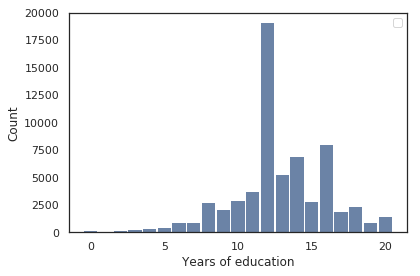

In [51]:
from thinkstats2 import Hist, Pmf, Cdf
import thinkplot

hist_educ = Hist(gss.educ)
thinkplot.hist(hist_educ)
decorate(xlabel='Years of education', 
         ylabel='Count')

`Hist` as defined in `thinkstats2` is different from `hist` as defined in Matplotlib.  The difference is that `Hist` keeps all unique values and does not put them in bins.  Also, `hist` does not handle `NaN`.

One of the hazards of using `hist` is that the shape of the result depends on the bin size.

**Exercise:** 

1. Run the following cell and compare the result to the `Hist` above.

2. Add the keyword argument `bins=11` to `plt.hist` and see how it changes the results.

3. Experiment with other numbers of bins.

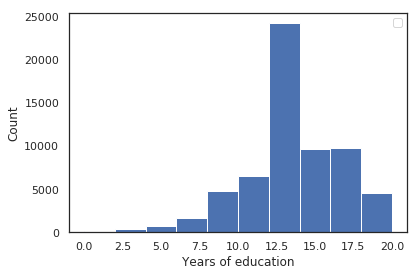

In [53]:
import matplotlib.pyplot as plt

plt.hist(gss.educ.dropna())
decorate(xlabel='Years of education', 
         ylabel='Count')

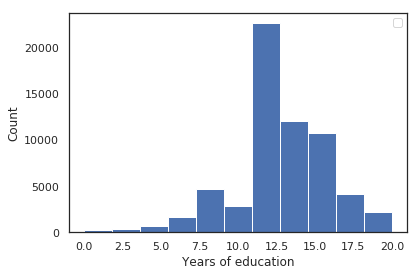

In [52]:
import matplotlib.pyplot as plt

plt.hist(gss.educ.dropna(),bins=11)
decorate(xlabel='Years of education', 
         ylabel='Count')

It definitely changes the peaks of the bar graph. For example, in the first graph, the bars steadily increase until they jump a great deal. In the second, there is a peak between 7.5 and 10 years of education.

However, a drawback of `Hist` and `Pmf` is that they basically don't work when the number of unique values is large, as in this example:

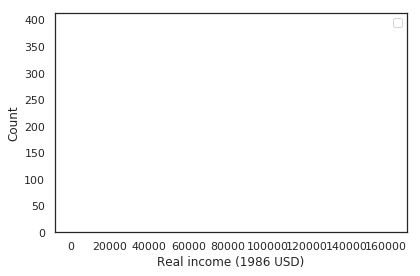

In [54]:
hist_realinc = Hist(gss.realinc)
thinkplot.hist(hist_realinc)
decorate(xlabel='Real income (1986 USD)', 
         ylabel='Count')

**Exercise:**
    
1. Make and plot a `Hist` of `age`.

2. Make and plot a `Pmf` of `educ`.

3. What fraction of people have 12, 14, and 16 years of education?

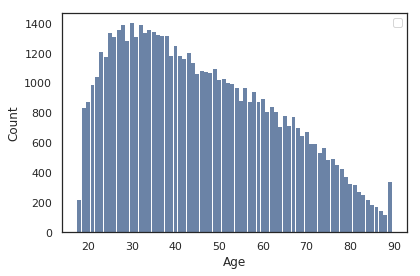

In [58]:
# Solution goes here
hist_age = Hist(gss.age)
thinkplot.hist(hist_age)
decorate(xlabel='Age', 
         ylabel='Count')

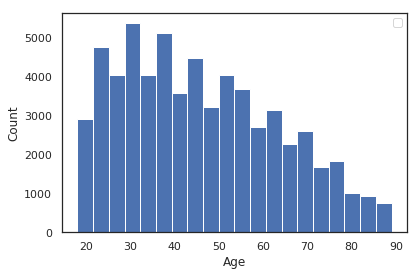

In [59]:
plt.hist(gss.age.dropna(), bins=20)
decorate(xlabel='Age', 
         ylabel='Count')

In [62]:
from thinkstats2 import Pmf
pmf = Pmf(gss.educ.dropna())

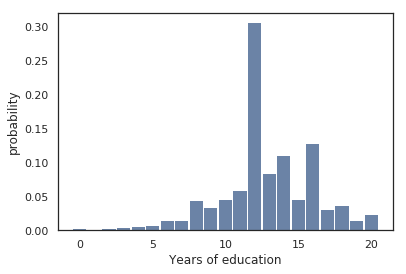

In [63]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel="Years of education",
                ylabel='probability')

In [65]:
pmf.Normalize()
pmf.Total()

1.0

In [66]:
pmf[12],pmf[14],pmf[16]

(0.30511141077505943, 0.10991780645989856, 0.12722339947344766)

30.5% of people have 12 years, 10.9% have 14 years, 12.7% have 16 years of education.

**Exercise:**
    
1. Make and plot a `Cdf` of `educ`.

2. What fraction of people have more than 12 years of education?

In [68]:
from thinkstats2 import Cdf
cdf_educ = Cdf(gss.educ.dropna())
cdf_educ

Cdf([ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.], [0.0025846  0.00330701 0.00568291 0.00964811 0.01468888 0.0210942
 0.03406537 0.0480479  0.09121557 0.12383613 0.16902652 0.22758942
 0.53270083 0.61580941 0.72572722 0.7704039  0.8976273  0.92764721
 0.96400822 0.97805497 1.        ])

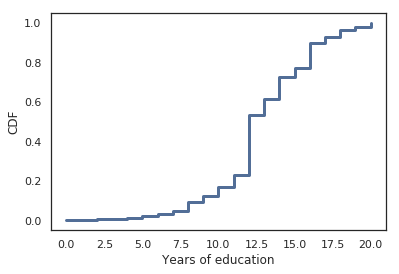

<Figure size 576x432 with 0 Axes>

In [71]:
thinkplot.Cdf(cdf_educ)
thinkplot.Show(xlabel='Years of education', ylabel='CDF')

In [85]:
100 - cdf_educ.PercentileRank(0), 100 - cdf_educ.PercentileRank(12), 100 - cdf_educ.PercentileRank(13)

(99.74153984460284, 46.72991716432286, 38.41905862711103)

46.72% of people have 12 years or more of education, 38.41% have more than 12 years.

**Exercise:**
    
1. Make and plot a `Cdf` of `age`.

2. What is the median age?  What is the inter-quartile range (IQR)?

In [86]:
cdf_age = Cdf(gss.age)
cdf_age

Cdf([18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.], [0.00351835 0.01693309 0.03091011 0.04676681 0.06350711 0.08293036
 0.10180737 0.12325488 0.14422042 0.16594104 0.18822395 0.20885212
 0.23134388 0.25232549 0.27462447 0.29603984 0.31784079 0.33941682
 0.36065547 0.3818138  0.4028918  0.42186521 0.44188288 0.46087236
 0.47952446 0.49881918 0.51703751 0.53409912 0.55146598 0.56872038
 0.58586232 0.60338983 0.61977669 0.63625994 0.65230942 0.66827858
 0.68383003 0.69798377 0.71353522 0.72759258 0.742646   0.75660696
 0.77096956 0.78387019 0.79738132 0.81033015 0.82162423 0.83415535
 0.84561009 0.85802876 0.86924251 0.87965298 0.89048116 0.8999759
 0.90951884 0.91806571 0.92712668 0.93485421 0.94269419 0.94990762
 0.95668728 0.96258334 0.96780464

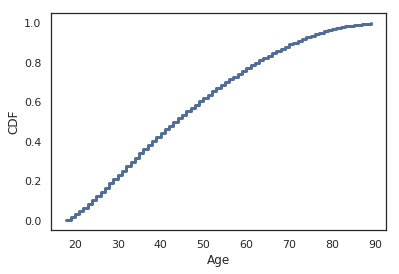

<Figure size 576x432 with 0 Axes>

In [87]:
thinkplot.Cdf(cdf_age)
thinkplot.Show(xlabel='Age', ylabel='CDF')

In [89]:
cdf_age.Percentile(50)

44.0

In [90]:
cdf_age.Percentile(75) - cdf_age.Percentile(25)

28.0

The median age is 44 years of age, and the IQR is 28 years.

**Exercise:**

Find another numerical variable, plot a histogram, PMF, and CDF, and compute any statistics of interest.

I will use the sibs variable that I found and cleaned in the dataset earlier.

In [102]:
gss['sibs'].value_counts().sort_index()

0.0      3047
1.0     10152
2.0     11313
3.0      9561
4.0      7024
5.0      5066
6.0      3849
7.0      3296
8.0      2165
9.0      1608
10.0     1105
11.0      865
12.0      577
13.0      393
14.0      220
15.0      146
16.0      108
17.0       52
18.0       44
19.0       25
20.0       31
21.0       49
22.0       17
23.0       15
24.0        5
25.0        6
26.0        6
27.0        7
28.0        1
29.0        2
30.0        4
31.0        6
32.0        2
33.0        2
34.0        1
35.0        1
37.0        1
43.0        1
55.0        1
68.0        1
Name: sibs, dtype: int64

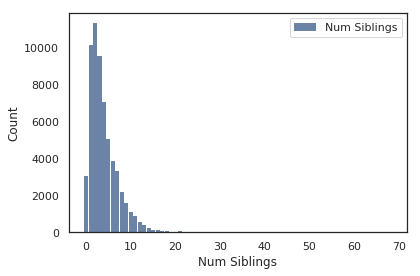

In [106]:
from thinkstats2 import Hist
hist = Hist(gss.sibs, label='Num Siblings')
thinkplot.Hist(hist)
decorate(xlabel='Num Siblings', 
         ylabel='Count')

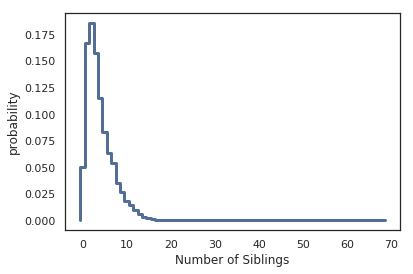

In [108]:
pmf = Pmf(gss.sibs)
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Number of Siblings",
                ylabel='probability')

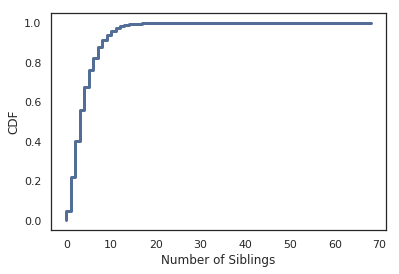

<Figure size 576x432 with 0 Axes>

In [109]:
cdf = Cdf(gss.sibs)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Number of Siblings', ylabel='CDF')

In [113]:
cdf.Percentile(50), cdf.Percentile(75)-cdf.Percentile(25)

(3.0, 3.0)

The median number of siblings is 3 and the IQR is also 3 siblings

In [114]:
cdf.PercentileRank(4)

67.62155491567256

I am in the 67% percentile when it comes to the number of siblings.

**Exercise:**

1. Compute the CDF of `realinc` for male and female respondents, and plot both CDFs on the same axes.

2. What is the difference in median income between the two groups?

In [99]:
males = gss[gss.sex==1]
females = gss[gss.sex==2]
cdf_male = Cdf(males.realinc, label='males')
cdf_female = Cdf(females.realinc, label='females')

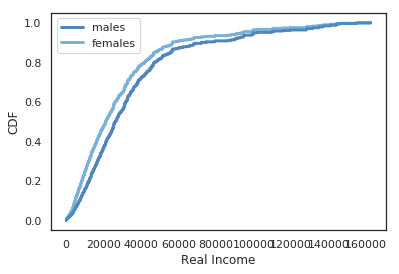

<Figure size 576x432 with 0 Axes>

In [100]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_male, cdf_female])
thinkplot.Show(xlabel='Real Income', ylabel='CDF')

In [101]:
cdf_male.Percentile(50) - cdf_female.Percentile(50)

5185.0

The difference in median income is $5185 in 1986 USD.

**Exercise:**

Use a variable to break the dataset into groups and plot multiple CDFs to compare distribution of something within groups.

Note: Try to find something interesting, but be cautious about overinterpreting the results.  Between any two groups, there are often many differences, with many possible causes.

In [117]:
gss['race'].describe()

count    62466.000000
mean         1.247335
std          0.540917
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: race, dtype: float64

In [120]:
gss.race.replace([3], np.nan, inplace=True)

In [119]:
gss['hapmar'].describe()

count    62466.000000
mean         0.690296
std          0.917753
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          9.000000
Name: hapmar, dtype: float64

In [121]:
gss.hapmar.replace([8], np.nan, inplace=True)
gss.hapmar.replace([9], np.nan, inplace=True)
gss.hapmar.replace([0], np.nan, inplace=True)

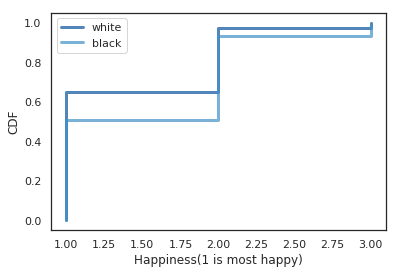

<Figure size 576x432 with 0 Axes>

In [123]:
white = gss[gss.race == 1]
black = gss[gss.race == 2]
cdf_white = Cdf(white.hapmar, label='white')
cdf_black = Cdf(black.hapmar, label='black')
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_white, cdf_black])
thinkplot.Show(xlabel='Happiness(1 is most happy)', ylabel='CDF')

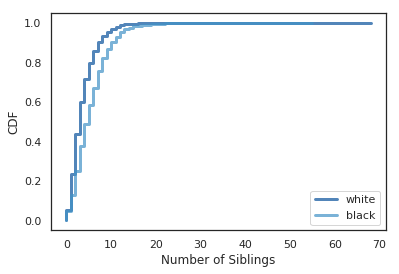

<Figure size 576x432 with 0 Axes>

In [124]:
cdf_white2 = Cdf(white.sibs, label='white')
cdf_black2 = Cdf(black.sibs, label='black')
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_white2, cdf_black2])
thinkplot.Show(xlabel='Number of Siblings', ylabel='CDF')

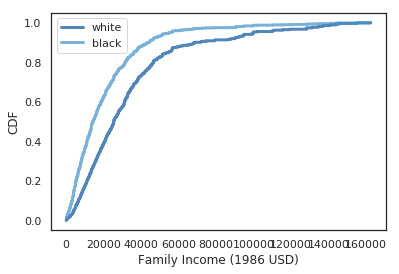

<Figure size 576x432 with 0 Axes>

In [125]:
cdf_white3 = Cdf(white.realinc, label='white')
cdf_black3 = Cdf(black.realinc, label='black')
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_white3, cdf_black3])
thinkplot.Show(xlabel='Family Income (1986 USD)', ylabel='CDF')

These CDFs indicate that white respondents, on average, had slightly fewer siblings and notably higher household incomes than black respondents.

## Save the cleaned data

Now that we have the data in good shape, we'll save it in a binary format (HDF5), which will make it faster to load later.

Also, we have to do some resampling to make the results representative.  We'll talk about this in class.

In [126]:
np.random.seed(19)
sample = utils.resample_by_year(gss, 'wtssall')

Save the file.

In [127]:
!rm gss.hdf5
sample.to_hdf('gss.hdf5', 'gss')

rm: cannot remove 'gss.hdf5': No such file or directory


Load it and see how fast it is!

In [128]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 11.8 ms, sys: 16.2 ms, total: 28 ms
Wall time: 26.4 ms


(62466, 101)